<a href="https://colab.research.google.com/github/Shah-in-alam/AI-Basic-to-Advance/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Boosting (Specially: XGBoost)

## What is Gradient Boosting ?
#### Gradient Boosting is an ensureable learning method that builds a strong model by combining multiple weak learners, typically decision trees, in a sequential manner.
#### Each tree corrects the error of the previous ones by minimizing the gradinet of the loss function (hence the name).

## Why XGBoost?
XGBoost stands for Extreme Gradient Boosting. it's a high-performance implementation of gradient boosting that:
###. Handles missing values
###. Is regularized less overfiting
###. Supports parallelization fast
###. often wins kaggle competitions

#Real Use Cases:
###. Credit scoring
###. Fraud detection
###. Structured data competitions
###. Customer churn prediction



### Predicting Titanic Survivors using XGBoost
Project Overview:
Load and explore the dataset

Clean and preprocess data

Encode categorical features

Split train/test

Train XGBoost model

Evaluate accuracy

Show feature importance

/tmp/ipython-input-11-3303808729.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
/tmp/ipython-input-11-3303808729.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

Accuracy: 0.7988826815642458

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



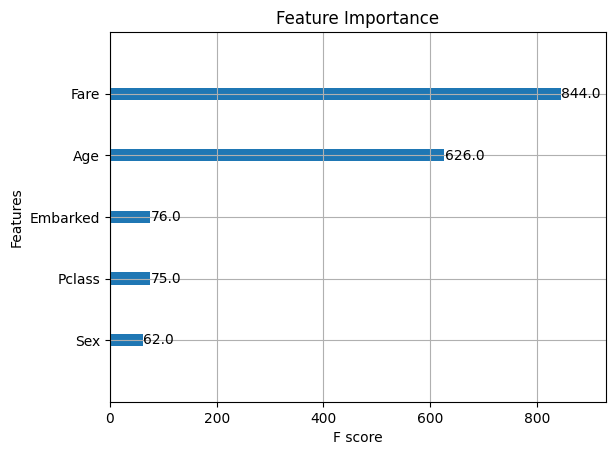

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt

# Load the data from github
url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df=pd.read_csv(url)

#Processing
df =df[['Survived','Pclass','Sex','Age','Fare','Embarked']]
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

##Encode categorical features

df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

#Split the data
X=df.drop('Survived',axis=1)
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Train XGBoost model
model =xgb.XGBClassifier(use_label_encoder=False,eval_metrics='logloss')
model.fit(X_train,y_train)

#predict
y_pred=model.predict(X_test)

#Evaluate
print("Accuracy:", accuracy_score(y_test,y_pred))
print("\nClassification Report: \n",classification_report(y_test,y_pred))

# Feature importance
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Part 1 : Use GridSearchCV to Optimize XGBoost Hyperparameters

In [20]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

#Define parameter grid
param_grid ={
    'max_depth': [3,4,5],
    'learning_rate':[0.05,0.1,0.2],
    'n_estimators':[50,100,200],
    'subsample':[0.8,1]
}

#initialize base model
xgb_model =xgb.XGBRFClassifier(use_label_encoder=False,eval_metrics='logloss')

#Initialize GridSearchCV
grid_search =GridSearchCV(xgb_model,param_grid,cv=5,scoring='accuracy',verbose=1,n_jobs=1)
grid_search.fit(X_train,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

#Train best model
best_model =grid_search.best_estimator_

#predict
y_pred=best_model.predict(X_test)
print("Test accuracy after tuning:", accuracy_score(y_test,y_pred))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1}
Best CV accuracy: 0.7626021865458485
Test accuracy after tuning: 0.7262569832402235


#Part 2: Convert it into a Gradio Web app
## What it will do:
Take user input: Age, Fare, Sex, Pclass, Embarked

Return prediction: Survived or Not

Use the best trained model

In [23]:
import gradio as gr

#load reguired encodings
pclass_options = [1, 2, 3]
sex_options = ['male', 'female']
embarked_options = ['S', 'C', 'Q']

def predict_survival(pclass, sex, age, fare, embarked):
    # Preprocess inputs
    sex_num = 0 if sex == 'male' else 1
    embarked_num = {'S': 0, 'C': 1, 'Q': 2}[embarked]
    input_df = pd.DataFrame([[pclass, sex_num, age, fare, embarked_num]],
                            columns=['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'])

    # Predict
    prediction = best_model.predict(input_df)[0]
    return " Survived" if prediction == 1 else " Did Not Survive"

# Build interface
interface = gr.Interface(
    fn=predict_survival,
    inputs=[
        gr.Dropdown(pclass_options, label="Passenger Class"),
        gr.Radio(sex_options, label="Sex"),
        gr.Slider(0, 80, value=30, label="Age"),
        gr.Slider(0, 500, value=50, label="Fare"),
        gr.Radio(embarked_options, label="Embarked Port")
    ],
    outputs="text",
    title="🚢 Titanic Survival Predictor (XGBoost + GridSearchCV)"
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bdded5cf731abe62ad.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
